# Synthetic Credit Card Prediction

### By- Pratik Santosh Akole 

### For- Statsly Analytics

### Problem Statement
- The company wants to automate the synthetic credit card approving process (real-time) based on customer
  detail provided. Given the data predict whether the customer should be approved for a synthetic credit card.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('synthetic_credit_card_approval.csv')
df.head()

,Num_Children,Group,Income,Own_Car,Own_Housing,Target
0,4,0,36151,0,0,0
1,0,0,36095,1,0,0
2,2,1,62110,1,1,0
3,0,1,73644,1,0,0
4,3,0,99146,0,0,1


In [3]:
rows = df.shape[0]
cols = df.shape[1]

print("There are " + str(rows) + " rows and " + str(cols) + " columns in this dataframe.")

There are 500000 rows and 6 columns in this dataframe.


In [4]:
# # Basic Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Num_Children  500000 non-null  int64
 1   Group         500000 non-null  int64
 2   Income        500000 non-null  int64
 3   Own_Car       500000 non-null  int64
 4   Own_Housing   500000 non-null  int64
 5   Target        500000 non-null  int64
dtypes: int64(6)
memory usage: 22.9 MB


In [5]:
dupRows= df.duplicated().sum()
print("There are " + str(dupRows) + " duplicated rows in the dataframe. They will be removed.")

There are 49202 duplicated rows in the dataframe. They will be removed.


In [6]:
df.drop_duplicates(keep='first',inplace=True)

In [7]:
dupRows= df.duplicated().sum()
print("There are " + str(dupRows) + " duplicated rows in the dataframe.")

There are 0 duplicated rows in the dataframe.


In [8]:
# Checking for missing value
df.isna().sum()

Num_Children    0
Group           0
Income          0
Own_Car         0
Own_Housing     0
Target          0
dtype: int64

#### - There is no misssing values in dataset.

In [9]:
df.describe()

,Num_Children,Group,Income,Own_Car,Own_Housing,Target
count,450798.000000,450798.00000,450798.000000,450798.000000,450798.000000,450798.000000
mean,2.029421,0.50075,72542.748608,0.688823,0.409137,0.387249
std,1.444037,0.50000,22923.004922,0.462976,0.491675,0.487122
min,0.000000,0.00000,30000.000000,0.000000,0.000000,0.000000
25%,1.000000,0.00000,53401.000000,0.000000,0.000000,0.000000
50%,2.000000,1.00000,72146.000000,1.000000,0.000000,0.000000
75%,3.000000,1.00000,90615.750000,1.000000,1.000000,1.000000
max,11.000000,1.00000,119999.000000,1.000000,1.000000,1.000000


- Income Varies from 30000 to 119999 
- Number of Children varies from 0 to 11

## Univariate analysis

<AxesSubplot:xlabel='Num_Children', ylabel='count'>

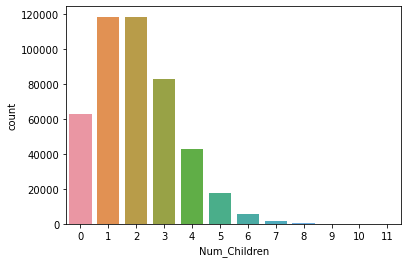

In [10]:
# Univariate analysis
sns.countplot(data=df, x='Num_Children')

- Aproximate 120000 peoples have 1 0r 2 children. some of having 3 children.
- Also there are some peoples who have no child.

In [11]:
df.Group.value_counts()

1    225737
0    225061
Name: Group, dtype: int64

In [12]:
(df['Income']).value_counts()

83101     16
41211     16
84256     16
72432     15
91652     15
          ..
105940     1
107987     1
118837     1
119581     1
117877     1
Name: Income, Length: 88775, dtype: int64

In [13]:
df.Target.value_counts()

0    276227
1    174571
Name: Target, dtype: int64

- From above value count we can say that data set is imbalance.

<AxesSubplot:xlabel='Target', ylabel='count'>

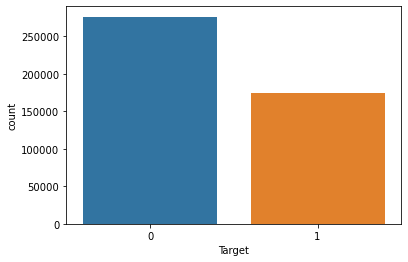

In [14]:
sns.countplot(data=df, x='Target')

<AxesSubplot:ylabel='Target'>

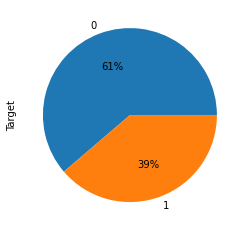

In [15]:
df['Target'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

<AxesSubplot:xlabel='Own_Car', ylabel='count'>

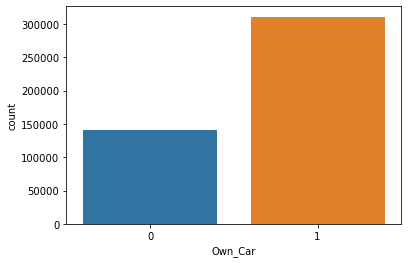

In [16]:
sns.countplot(data=df, x='Own_Car')

<AxesSubplot:ylabel='Own_Car'>

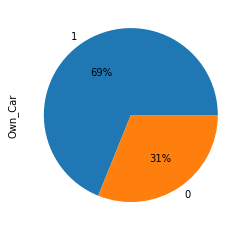

In [17]:
df['Own_Car'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

- From above plot, we clearly see that 69% of customer have there own car.

<AxesSubplot:xlabel='Own_Housing', ylabel='count'>

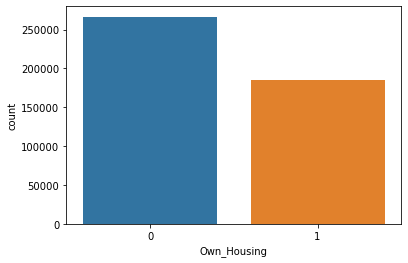

In [18]:
sns.countplot(data=df, x='Own_Housing')

<AxesSubplot:ylabel='Own_Housing'>

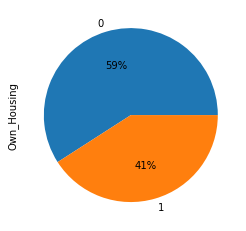

In [19]:
df['Own_Housing'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

- From above plot, we clearly see that 59% of customer have there own House.

<AxesSubplot:>

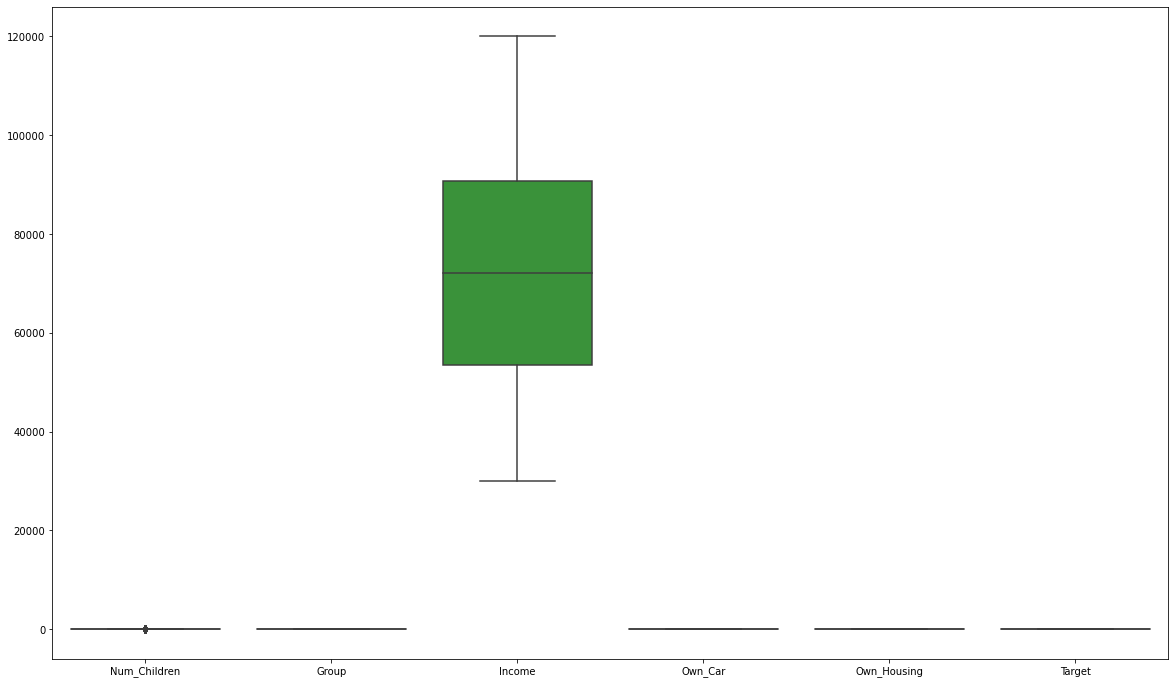

In [20]:
plt.figure(figsize=(20,12))
sns.boxplot(data=df)

## Bivariate Analysis

<AxesSubplot:xlabel='Own_Car', ylabel='count'>

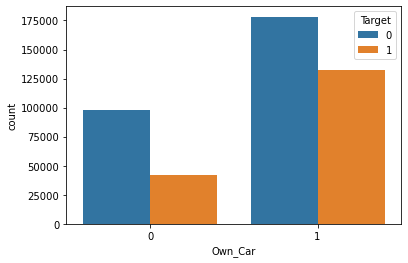

In [21]:
# Bivariate
sns.countplot(data=df, x='Own_Car', hue='Target')

- From above plot we can see that some of customer have their own car some of having no but still they get a credit card.
- so we can say that there is a 90% chances customer can get a credit card even if they have own or not.

<AxesSubplot:xlabel='Own_Housing', ylabel='count'>

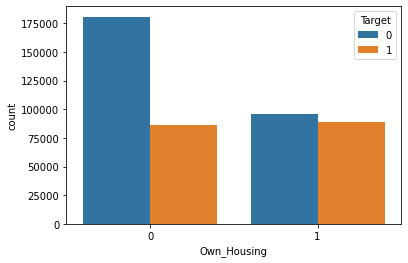

In [22]:
sns.countplot(data=df, x='Own_Housing', hue='Target')

<AxesSubplot:xlabel='Group', ylabel='count'>

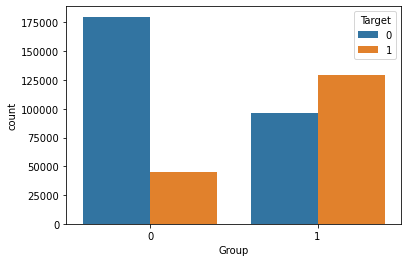

In [23]:

sns.countplot(data=df, x='Group', hue='Target')

Text(0.5, 1.0, 'Distribution Plot of Income with Target')

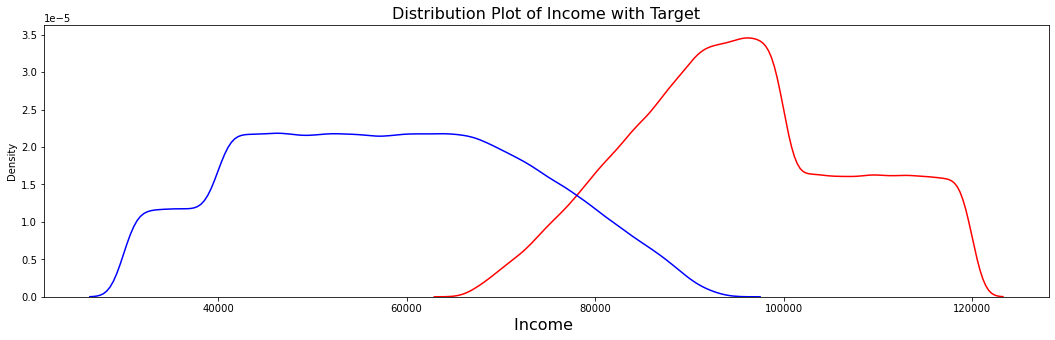

In [25]:
plt.figure(figsize=(18,5))

sns.distplot(df['Income'][df['Target']==1],hist=False,color='red')

sns.distplot(df['Income'][df['Target']==0],hist=False,color='blue')

plt.xlabel('Income ', fontsize = 16)
plt.title('Distribution Plot of Income with Target', fontsize = 16)

- From above plot we can say that there is 90% chance to get a credit card if income of customer in between 70000 to 120000.

In [26]:
from scipy.stats import skew

Num_Children
0.6834612573709125


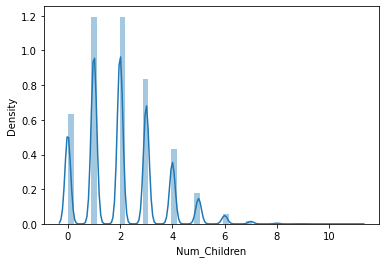

Group
-0.0029991293664046047


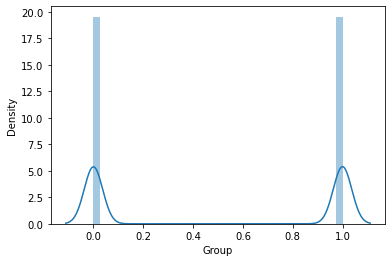

Income
0.11005688160310534


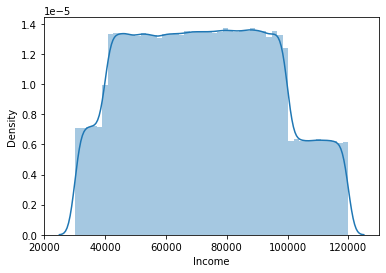

Own_Car
-0.8156937624688947


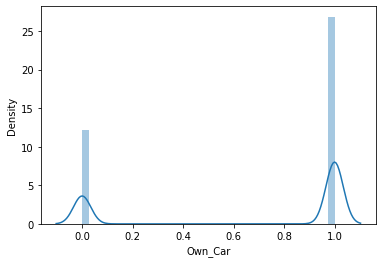

Own_Housing
0.36960755611555396


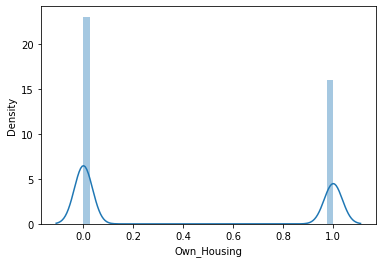

Target
0.4629284839385874


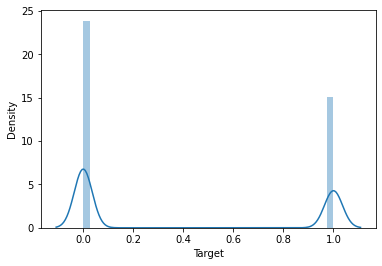

In [27]:
for col in df:
    print(col)
    print(skew( df[col] ))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

<AxesSubplot:>

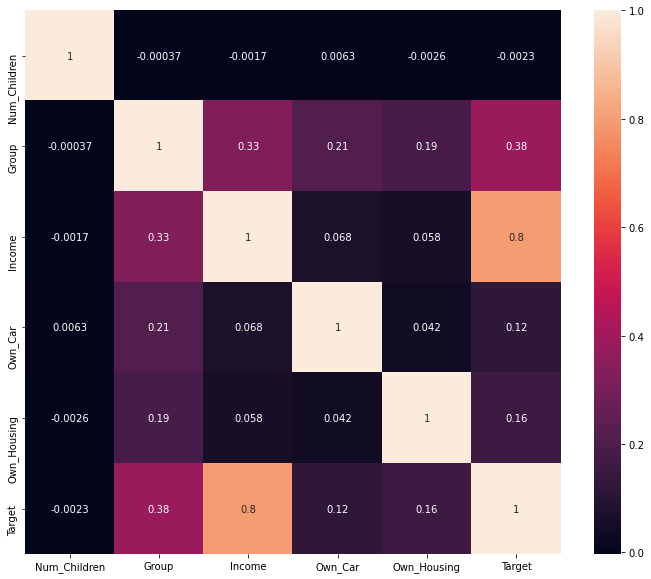

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

- From above heatma we can see that Income column is highly corelated with target column.

# Preprocessing

In [29]:
# seerate the data in X and Y
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [30]:
x

array([[    4,     0, 36151,     0,     0],
       [    0,     0, 36095,     1,     0],
       [    2,     1, 62110,     1,     1],
       ...,
       [    3,     0, 66476,     0,     0],
       [    2,     1, 74524,     0,     0],
       [    4,     0, 31129,     1,     0]], dtype=int64)

In [31]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
# split dataset into train and test
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.33, random_state=1)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

# model training

In [34]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

# Predict on train and test set
train_pred = logreg.predict(xtrain)
test_pred =  logreg.predict(xtest)

print("Training Accuracy: ",accuracy_score(ytrain, train_pred))
print("Test Accuracy: ",accuracy_score(ytest, test_pred))

Training Accuracy:  0.9711919850083103
Test Accuracy:  0.9709069398510393


In [35]:
ypred = logreg.predict(xtest)
print(classification_report(ytest, ypred))    
print(confusion_matrix(ytest, ypred))    

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     91122
           1       0.96      0.96      0.96     57642

    accuracy                           0.97    148764
   macro avg       0.97      0.97      0.97    148764
weighted avg       0.97      0.97      0.97    148764

[[88961  2161]
 [ 2167 55475]]


In [36]:
svm = SVC()
svm.fit(xtrain, ytrain)

# Predict on train and test set
train_pred = svm.predict(xtrain)
test_pred =  svm.predict(xtest)

print("Training Accuracy: ",accuracy_score(ytrain, train_pred))
print("Test Accuracy: ",accuracy_score(ytest, test_pred))

Training Accuracy:  0.9712118503214869
Test Accuracy:  0.9708934957382163


In [37]:
ypred = logreg.predict(xtest)
print(classification_report(ytest, ypred))    
print(confusion_matrix(ytest, ypred))    

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     91122
           1       0.96      0.96      0.96     57642

    accuracy                           0.97    148764
   macro avg       0.97      0.97      0.97    148764
weighted avg       0.97      0.97      0.97    148764

[[88961  2161]
 [ 2167 55475]]


In [37]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

train_pred = knn.predict(xtrain)
test_pred = knn.predict(xtest)

print("Training Accuracy: ",accuracy_score(ytrain, train_pred))
print("Test Accuracy: ",accuracy_score(ytest, test_pred))

Training Accuracy:  0.9767575835833052
Test Accuracy:  0.9661342797988761


In [38]:
ypred = knn.predict(xtest)
print(classification_report(ytest, ypred))    
print(confusion_matrix(ytest, ypred))    

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     91122
           1       0.96      0.96      0.96     57642

    accuracy                           0.97    148764
   macro avg       0.96      0.96      0.96    148764
weighted avg       0.97      0.97      0.97    148764

[[88601  2521]
 [ 2517 55125]]


In [40]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

train_pred = rf.predict(xtrain)
test_pred = rf.predict(xtest)

print("Training Accuracy: ",accuracy_score(ytrain, train_pred))
print("Test Accuracy: ",accuracy_score(ytest, test_pred))

Training Accuracy:  0.9974175092870339
Test Accuracy:  0.9600440966900594


# HyperParameter

In [41]:
logreg = LogisticRegression(solver='liblinear',C=100, max_iter=100)
logreg.fit(xtrain, ytrain)

# Predict on train and test set
train_pred = logreg.predict(xtrain)
test_pred =  logreg.predict(xtest)

print("Training Accuracy: ",accuracy_score(ytrain, train_pred))
print("Test Accuracy: ",accuracy_score(ytest, test_pred))

Training Accuracy:  0.9711886741227809
Test Accuracy:  0.9709136619074508


In [39]:
svm = SVC(kernel='linear')
svm.fit(xtrain, ytrain)

# Predict on train and test set
train_pred = svm.predict(xtrain)
test_pred =  svm.predict(xtest)

print("Training Accuracy: ",accuracy_score(ytrain, train_pred))
print("Test Accuracy: ",accuracy_score(ytest, test_pred))

Training Accuracy:  0.9711688088096042
Test Accuracy:  0.9709271060202738


In [42]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini')
rf.fit(xtrain, ytrain)

train_pred = rf.predict(xtrain)
test_pred = rf.predict(xtest)

print("Training Accuracy: ",accuracy_score(ytrain, train_pred))
print("Test Accuracy: ",accuracy_score(ytest, test_pred))

Training Accuracy:  0.9974141984015045
Test Accuracy:  0.9601247613669974


In [43]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(xtrain, ytrain)

train_pred = rf.predict(xtrain)
test_pred = rf.predict(xtest)

print("Training Accuracy: ",accuracy_score(ytrain, train_pred))
print("Test Accuracy: ",accuracy_score(ytest, test_pred))

Training Accuracy:  0.9974241310580928
Test Accuracy:  0.9599970422951789


## Conclusion

- From Above analysis
- 1) 69% of customer have there own car.
- 2) 59% of customer have there own House.
- 3) some of customer have their own car  but some of having no but still they get a credit card.
- 4) some of customer have their own house but some of having no but still they get a credit card.
- 5) Income column is highly corelated with target column.
- 6) There is 90% chance to get a credit card if income of customer in between 70000 to 120000.